## Project: Grocery Shopping Habits (Exploratory Data Analysis)

### Introduction

This project is working with data from Instacart, an online grocery delivery service. The datasets are adapted/modified from files provided in a 2017 Kaggle competition. The requirements include cleaning up the provided data in order to analyze and report on findings on user shopping habits.

### Stages

The project will be done in three stages:
1. Data overview
2. Data preprocessing
3. Data analysis

## Data overview

Open the files and explore the data's contents.

First, import project dependencies:

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

Read the provided CSV files from the `datasets` folder and save them to `df_*` variables:

In [3]:
# Use the sep= parameter to clean up the column structure for each file
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

Print the first 10 table rows per dataset:

In [4]:
display(df_orders.head(10))
display(df_products.head(10))
display(df_departments.head(10))
display(df_aisles.head(10))
display(df_order_products.head(10))

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


Obtain general information about each dataset table:

In [5]:
# Wrap everything in print() so each result gets shown
print(df_orders.info())
print()
print(df_products.info())
print()
print(df_departments.info())
print()
print(df_aisles.info())
print()
# Per project instructions: order products has many rows,
# so use show_counts=True to print non-null counts
print(df_order_products.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory 

At first glance, we can already spot a few discrepancies from each table against its total number of entries:

* In orders, `'days_since_prior_order'` is missing values
* In products, `'product_name'` is missing values
* In order products, `'add_to_cart_order'` is missing values

Aisle and department datasets, respectively, are smaller in size and more constant/static than the other data, so we expect those to have less issues when preprocessing.

## Data preprocessing

Identify and deal with missing values.

In [6]:
# Count missing values using *.isna().sum()
# Wrap everything in print() so each result gets shown
print(df_orders.isna().sum())
print()
print(df_products.isna().sum())
print()
print(df_departments.isna().sum())
print()
print(df_aisles.isna().sum())
print()
print(df_order_products.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

department_id    0
department       0
dtype: int64

aisle_id    0
aisle       0
dtype: int64

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


`df_products['product_name']` and `df_order_products['add_to_cart_order']` have missing values, but we won't drop anything for now. `df_orders['days_since_prior_order']` also has missing values, but we should look into them a little deeper:

In [7]:
df_orders['days_since_prior_order'].value_counts(dropna=False).sort_index()

0.0      9589
1.0     20179
2.0     27141
3.0     30225
4.0     31007
5.0     30096
6.0     33931
7.0     44579
8.0     25361
9.0     16754
10.0    13310
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6588
17.0     5498
18.0     4972
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51338
NaN     28819
Name: days_since_prior_order, dtype: int64

We'll want to deal with `NaN` in `df_orders['days_since_prior_order']` later, so we won't drop anything here for now either.

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [8]:
# Check for duplicated orders
df_orders.duplicated().sum()

15

Orders have duplicate rows (15 of them).

In [9]:
# Check for all orders placed Wednesday at 2:00 AM
df_wed_orders_at_2 = df_orders[(df_orders['order_hour_of_day'] == 2) & (df_orders['order_dow'] == 4)]
print(df_wed_orders_at_2.info())
print()
df_wed_orders_at_2.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 2124 to 478126
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                114 non-null    int64  
 1   user_id                 114 non-null    int64  
 2   order_number            114 non-null    int64  
 3   order_dow               114 non-null    int64  
 4   order_hour_of_day       114 non-null    int64  
 5   days_since_prior_order  110 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.2 KB
None



0

Checking a sample of orders (orders placed Wednesday at 2:00am) shows no duplicate orders.

In [10]:
# Remove duplicate orders
df_orders = df_orders.drop_duplicates().reset_index(drop=True)
df_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [11]:
# Double check for duplicate rows
df_orders.duplicated().sum()

0

After the initial removal, a double-check shows no more duplicate
rows in orders.

In [12]:
# Double check for duplicate order IDs only
df_orders.duplicated('order_id').sum()

0

Double-checking for duplicate rows by order id only also still shows no duplicate rows in orders.

### `products` data frame

In [13]:
# Check for fully duplicate rows
products_duplicates = df_products.duplicated()
products_duplicates_count = products_duplicates.sum()
products_duplicates_count

0

Products appear to have no duplicate rows.

In [14]:
# Check for just duplicate product IDs
product_ids_duplicates = df_products.duplicated('product_id')
product_ids_duplicates_count = product_ids_duplicates.sum()
product_ids_duplicates_count

0

Checking for just duplicate product ids shows no duplicate products by product id.

In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
# We'll make an extra column of lowercased product names to deal with duplicates
# as to not modify the existing product names column
df_products['product_name_lowercase'] = df_products['product_name'].str.lower()
duplicates_product_name = df_products[df_products.duplicated(subset=['product_name_lowercase'], keep=False)]
duplicates_product_name

,product_id,product_name,aisle_id,department_id,product_name_lowercase
37,38,NaN,100,21,NaN
41,42,Biotin 1000 mcg,47,11,biotin 1000 mcg
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17,fresh scent dishwasher detergent with dawn
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


Checking for just duplicates by product name reveals there are 1361 of them.

In [16]:
# Drop duplicates from product names
# using the new column copy containing lowercased
# product names that was created to deal with duplicates
dropped_duplicates_product_name = duplicates_product_name.drop_duplicates(subset=['product_name_lowercase'])
dropped_duplicates_product_name

,product_id,product_name,aisle_id,department_id,product_name_lowercase
37,38,NaN,100,21,NaN
41,42,Biotin 1000 mcg,47,11,biotin 1000 mcg
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17,fresh scent dishwasher detergent with dawn
515,516,American Cheese Slices,21,16,american cheese slices
1538,1539,Cauliflower head,83,4,cauliflower head
...,...,...,...,...,...
43222,43223,Spreadable Butter With Canola Oil,36,16,spreadable butter with canola oil
44314,44315,Burrito- Steak & Cheese,38,1,burrito- steak & cheese
45276,45277,Cookies 'n Cream Ice Cream,37,1,cookies 'n cream ice cream
46024,46025,Pineapple Slices in 100% Pineapple Juice,99,15,pineapple slices in 100% pineapple juice


In [17]:
# Double-check for any remaining duplicates after dropping
# Clean up the column copy of lowercased product names
duplicates_product_name = df_products[df_products.duplicated(subset=['product_name_lowercase'], keep=False)]
print(duplicates_product_name)
df_products = df_products.drop(columns=['product_name_lowercase'])

       product_id                                     product_name  aisle_id  \
37             38                                              NaN       100   
41             42                                  Biotin 1000 mcg        47   
71             72                                              NaN       100   
109           110                                              NaN       100   
185           186       Fresh Scent Dishwasher Detergent with Dawn        74   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id                   

In [18]:
# Check for duplicate product names that aren't missing
df_products[~df_products['product_name'].isna() & df_products['product_name'].duplicated()].sum()

product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

Double-checking for duplicate product names still shows no duplicate rows in products.

### `departments` data frame

In [19]:
# Check for duplicated rows
df_departments.duplicated().sum()

0

Departments appear to have no duplicate rows.

### `aisles` data frame

In [20]:
# Check for duplicated rows
df_aisles.duplicated().sum()

0

Aisles appear to have no duplicate rows.

### `order_products` data frame

In [21]:
# Check for duplicate rows
df_order_products.duplicated().sum()

0

Order products appear to have no duplicate rows.

In [22]:
# Double check for any other tricky duplicates
# Repeat earlier checks on the two columns from earlier:
# order ids in df_orders, product ids in df_products
df_order_products[df_order_products.duplicated(subset=['order_id', 'product_id'])].sum()

order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

There appears to be no more duplicates in order products when checking for tricky duplicates (i.e. by order id and product id).

## Find and remove missing values

### `products` data frame

In [23]:
# Are all of the missing product names associated with aisle ID 100?
df_missing_products = df_products[df_products['product_name'].isna()]
print(df_missing_products)
print()
(df_missing_products['aisle_id'] == 100).all()

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]



True

It looks like we can confirm that missing product names are in fact associated with aisle id 100.

In [24]:
# Are all of the missing product names associated with department ID 21?
(df_missing_products['department_id'] == 21).all()

True

In addition, missing product names are confirmed to be associated with department id 21.

In [25]:
# What is this aisle and department?
print(df_aisles[df_aisles['aisle_id'] == 100])
print(df_departments[df_departments['department_id'] == 21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Aisle id 100 and department id 21 are, respectively, their equivalents for the "missing" section for missing product names.

In [26]:
# Fill missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].where(~df_products['product_name'].isna(), 'Unknown')
df_products[df_products['product_name'] == 'Unknown']

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21


### `orders` data frame

In [27]:
# Are there any missing values where it's not a customer's first order?
df_orders[df_orders['order_number'] > 1].isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

There doesn't seem to be any missing values for orders beyond a customer's first order.

### `order_products` data frame

In [28]:
# What are the min and max values in this column?
# The question is vague but only the 'add_to_cart_order' column
# made the most sense to test for min and max values
print(df_order_products['add_to_cart_order'].max())
print(df_order_products['add_to_cart_order'].min())

64.0
1.0


For the `'add_to_cart_order'` column, the range was 1 as the min value and 64 as the max value.

In [29]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
order_ids_with_nan = df_order_products[df_order_products['order_id'] & df_order_products['add_to_cart_order'].isna()]
order_ids_with_nan

,order_id,product_id,add_to_cart_order,reordered
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
30114,1959075,42828,NaN,1
34183,844733,32717,NaN,0
57981,61355,5322,NaN,0
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [30]:
# Do all orders with missing values have more than 64 products?
order_ids_with_nan.sort_values(by='order_id').groupby('order_id')['product_id'].count().sort_values(ascending=False)

order_id
61355      63
2136777    44
1959075    34
1730767    31
2926893    28
1800005    28
1386261    27
3125735    22
2721963    22
1968313    16
1832957    14
1673227    14
844733     13
293169     13
404157     12
1183255    11
871281     10
1021563     9
2479011     9
2094761     9
1961723     9
3347453     7
2256933     7
1648217     6
2999801     6
165801      6
2409109     5
1169835     5
129627      5
1564093     5
2997021     4
1477139     4
854647      3
1302315     3
1633337     3
2979697     2
1625713     2
1529171     2
1308785     2
2170451     1
2621907     1
1598369     1
Name: product_id, dtype: int64

It looks like all orders with missing values have less than 64 products (63 is the max).

In [31]:
# Convert the 'add_to_cart_order' column to integer type
# and leave the missing values in the column as skips
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('Int64', errors="ignore")
df_order_products[df_order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,<NA>,0
9926,1968313,43867,<NA>,0
14394,2926893,11688,<NA>,0
16418,1717990,4142,<NA>,0
30114,1959075,42828,<NA>,1
...,...,...,...,...
4505662,1800005,7411,<NA>,0
4511400,1633337,260,<NA>,0
4517562,404157,9517,<NA>,0
4534112,1673227,17835,<NA>,0


## [A] Additional tasks

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

Hour of day:

In [32]:
((df_orders['order_hour_of_day'] >= 0) & (df_orders['order_hour_of_day'] <= 23)).all()

True

It's verified that `'order_hour_of_day'` falls within the 0 to 23 range.

Day of week:

In [33]:
((df_orders['order_dow'] >= 0) & (df_orders['order_dow'] <= 6)).all()

True

It's verified that `'order_dow'` falls within the 0 to 6 range.

### [A2] What time of day do people shop for groceries?

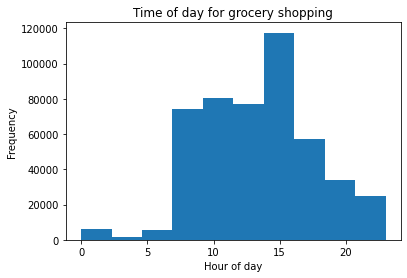

In [39]:
# Could not get xlabel= working for histograms, so using set_xlabel() instead
df_orders['order_hour_of_day'].plot(kind='hist',
                                    title='Time of day for grocery shopping'
                             ).set_xlabel('Hour of day')
                                
plt.show()

People like to shop between morning and afternoon, with the peak happening around 3pm.

### [A3] What day of the week do people shop for groceries?

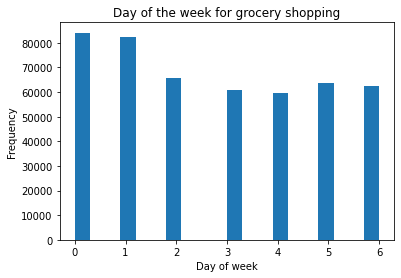

In [34]:
# Could not get xlabel= working for histograms, so using set_xlabel() instead
df_orders['order_dow'].plot(kind='hist',
                            bins=20,
                            title='Day of the week for grocery shopping'
                     ).set_xlabel('Day of week')
plt.show()

People tend to shop more for groceries on the weekend with Saturday being the busiest day day, followed closely by Sunday.

### [A4] How long do people wait until placing another order?

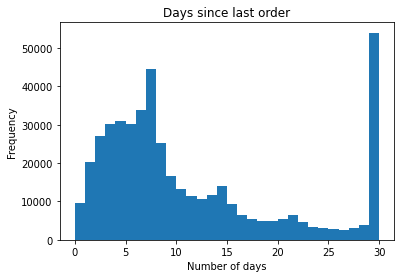

In [35]:
# Could not get xlabel= working for histograms, so using set_xlabel() instead
df_orders['days_since_prior_order'].plot(kind='hist',
                                         bins=30,
                                         title='Days since last order'
                                  ).set_xlabel('Number of days')
plt.show()

People tend to wait within week (or a few days leading up to a week) since they last placed an order to place their next order. Though the longest amount of time that people tend to wait until placing another order is at the one month mark.

## [B] Additional tasks

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

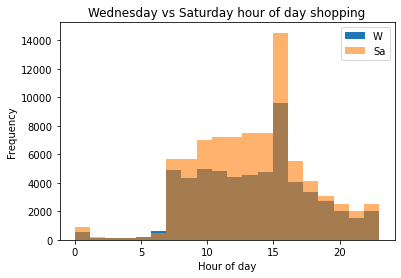

In [36]:
orders_wed = df_orders.query('order_dow == 4')['order_hour_of_day']
orders_sat = df_orders.query('order_dow == 0')['order_hour_of_day']

# Could not get xlabel= working for histograms, so using set_xlabel() instead
orders_wed.plot(kind='hist',
                bins=20,
                title='Wednesday vs Saturday hour of day shopping'
         ).set_xlabel('Hour of day')
orders_sat.plot(kind='hist',
                bins=20,
                alpha=0.6)
plt.legend(['W', 'Sa'])
plt.show()

Wednesdays and Saturdays are very close when comparing the hour of day when people shop. As with a previous observation, the window between morning and afternoon is popular, with a peak around 3pm. The main difference is that Saturday's distribution is slightly, proportionally larger in volume than Wednesdays (maybe by about ~30-40% more during the peaks).

### [B2] What's the distribution for the number of orders per customer?

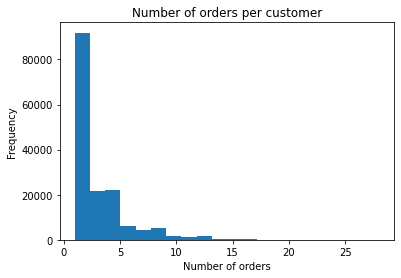

In [37]:
orders_per_customer = df_orders.groupby('user_id')['order_number'].count().sort_values(ascending=False)

# Could not get xlabel= working for histograms, so using set_xlabel() instead
orders_per_customer.plot(kind='hist',
                         bins=20,
                         title='Number of orders per customer'
                  ).set_xlabel('Number of orders')
plt.show()

It looks like most people aren't shopping long-term with Instacart. The peak is below 5 orders per customer. The max number is closer to 30 orders, but yet the drop-off in return shopping is significant after 5 or so orders for a typical, casual customer.

### [B3] What are the top 20 popular products (display their id and name)?

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dtype: int64


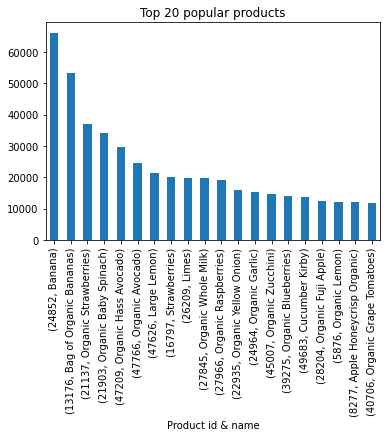

In [38]:
# Merge the two relevant datasets first
df_merged_ordered_products = df_order_products.merge(
    df_products,
    on='product_id'
)
top_20_products = df_merged_ordered_products.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).head(20)
print(top_20_products)
top_20_products.plot(kind='bar',
                     title='Top 20 popular products',
                     xlabel='Product id & name')
plt.show()

Judging by the data, the most popular products fall under common organic fruits and vegetables.

## [C] Additional tasks

### [C1] How many items do people typically buy in one order? What does the distribution look like?

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: add_to_cart_order, Length: 450046, dtype: int64


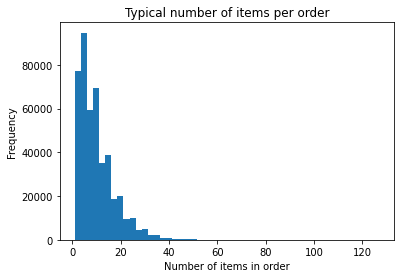

In [39]:
# Use 'add_to_cart_order' values to count up the number of items per order id
order_products_size = df_order_products.groupby('order_id')['add_to_cart_order'].size()
print(order_products_size)
order_products_size.plot(kind='hist',
                   bins=50,
                   title='Typical number of items per order'
             ).set_xlabel('Number of items in order')
plt.show()

People tend to buy less than ~10 items in an typical order. After ~20 items per order, the number starts to drop off more significantly. The most number of items in an order is 120+, but this isn't typical.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

product_name              product_id
Banana                    24852         55763
Bag of Organic Bananas    13176         44450
Organic Strawberries      21137         28639
Organic Baby Spinach      21903         26233
Organic Hass Avocado      47209         23629
Organic Avocado           47766         18743
Organic Whole Milk        27845         16251
Large Lemon               47626         15044
Organic Raspberries       27966         14748
Strawberries              16797         13945
Limes                     26209         13327
Organic Yellow Onion      22935         11145
Organic Garlic            24964         10411
Organic Zucchini          45007         10076
Cucumber Kirby            49683          9538
Organic Fuji Apple        28204          8989
Apple Honeycrisp Organic  8277           8836
Organic Blueberries       39275          8799
Organic Lemon             5876           8412
Organic Half & Half       49235          8389
Name: reordered, dtype: int64


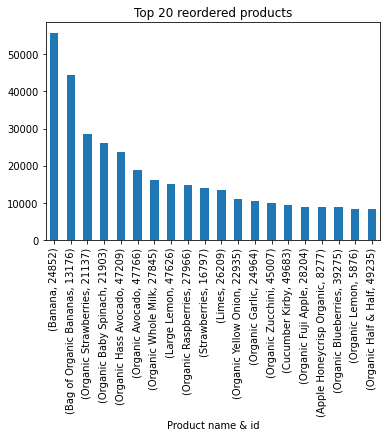

In [40]:
# Reuse the merged dataset from [B3], but this time filter
# the rows for products that have been reordered. The resulting Series
# and histogram plot will be done similiar to 5.10 [B3]'s solution
df_merged_ordered_products_reordered = df_merged_ordered_products[df_merged_ordered_products['reordered'] == 1]
top_20_reordered_products = df_merged_ordered_products_reordered.groupby(['product_name', 'product_id'])['reordered'].size().sort_values(ascending=False).head(20)
print(top_20_reordered_products)
top_20_reordered_products.plot(kind='bar',
                               title='Top 20 reordered products',
                               xlabel='Product name & id')
plt.show()

### [C3] For each product, what proportion of its orders are reorders?

In [41]:
# Reuse the merged dataset from [B3]
reordered_products_proportion = df_merged_ordered_products.groupby(['product_id', 'product_name'])['reordered'].mean()
reordered_products_proportion

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

### [C4] For each customer, what proportion of their products ordered are reorders?

In [42]:
# Merge the two relevant datasets first
df_merged_orders_products = df_orders.merge(
    df_order_products,
    on='order_id'
)
customer_reordered_proportion = df_merged_orders_products.groupby(['user_id', 'order_id'])['reordered'].mean()
print(customer_reordered_proportion)

user_id  order_id
2        738281      0.076923
         2168274     0.000000
4        2030307     0.000000
5        157374      0.666667
6        2086598     0.000000
                       ...   
206208   2471606     0.714286
         2573371     0.571429
         3128968     0.764706
206209   688306      0.250000
         2977660     0.444444
Name: reordered, Length: 450046, dtype: float64


### [C5] What are the top 20 items that people put in their carts first? 

In [43]:
# Reuse the merged dataset from [B3] again
df_merged_ordered_products_first_card_add = df_merged_ordered_products[df_merged_ordered_products['add_to_cart_order'] == 1]
top_20_first_cart_adds = df_merged_ordered_products_first_card_add.groupby(['product_id', 'product_name']).size().sort_values(ascending=False).head(20)
top_20_first_cart_adds

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

## Conclusion

The research done reveals some of the following shopping habits of Instacart customers:

Shoppers are actively ordering during the daytime (between morning and afternoon), with a steady decline following right after the usual afternoon peak. They tend to shop more during the weekends, likely when they have more time away from work and are planning for the week ahead.

Many shoppers will wait until about one week since their last order to place their next order. The highest frequency though is when shoppers wait to place the next order approximately one month following the previous order. This might be due to following regular monthly cycles with paying bills, rent and other reoccuring expenses (though that would require additional data & research to confirm).

Shoppers also don't seem loyal or motivated to keep shopping through the service, as the number of orders per customer tends to be quite low. This could be due to preferences split across competitors or alternatives to Instacart.

The most popular products (as well as the most popular reordered products) show that shoppers are health conscious when it comes to buying groceries. Shoppers also tend to only order less than a dozen items per order.